# challenge

## importing bad .csv files
Here we will get a taste of what it feels like to work with bad `.csv` files and how to fix them.  

TO DO:  

1. create a folder for this challenge, name it whatever you want.
1. downlad this jupyter notebook and move to that folder.
1. download these 3 `.csv` files and part 2 notebook:  
    1. <a href="/outliers/cleaning1.csv" download>cleaning1</a>
    1. <a href="/outliers/cleaning2-.csv" download>cleaning2-</a>
    1. <a href="/outliers/cleaning3.csv" download>cleaning3</a>
    1. <a href="/outliers/outliers_challenge_part2.ipynb" download>part_2</a>
1. move them files into your folder

### import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters

# %matplotlib widget

## dataset 1

In [2]:
df1 = pd.read_csv('cleaning1.csv')
df1

,date,A,B,C,D,E
0,2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000
1,2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300
2,2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504
3,2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084
4,2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579
...,...,...,...,...,...,...
105115,2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984
105116,2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110
105117,2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810
105118,2023-12-31 23:50:00,-36,1042.411572,-14809.212002,1506.174334,423.862432


Now let's put the column 'date' in the index with datetime format

In [3]:
# we can change the format of the column to datetime and then set it as the index.
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date', inplace=True)
df1

,A,B,C,D,E
date,,,,,
2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000
2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300
2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504
2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084
2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579
...,...,...,...,...,...
2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984
2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110
2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810


If we know that in advance, we can write everything in one command when we import the csv.

In [4]:
df1 = pd.read_csv('cleaning1.csv', 
                  index_col='date',     # set the column date as index 
                  parse_dates=True)     # turn to datetime format
df1

,A,B,C,D,E
date,,,,,
2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000
2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300
2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504
2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084
2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579
...,...,...,...,...,...
2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984
2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110
2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810


Now let's plot all the columns and see what we have.

In [5]:
def plot_all_columns(data):
    column_list = data.columns
    
    fig, ax = plt.subplots(len(column_list),1, sharex=True, figsize=(10,len(column_list)*2))

    if len(column_list) == 1:
        ax.plot(data[column_list[0]])
        return
    for i, column in enumerate(column_list):
        ax[i].plot(data[column])
        ax[i].set(ylabel=column)
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax[i].xaxis.set_major_locator(locator)
    ax[i].xaxis.set_major_formatter(formatter)

    return

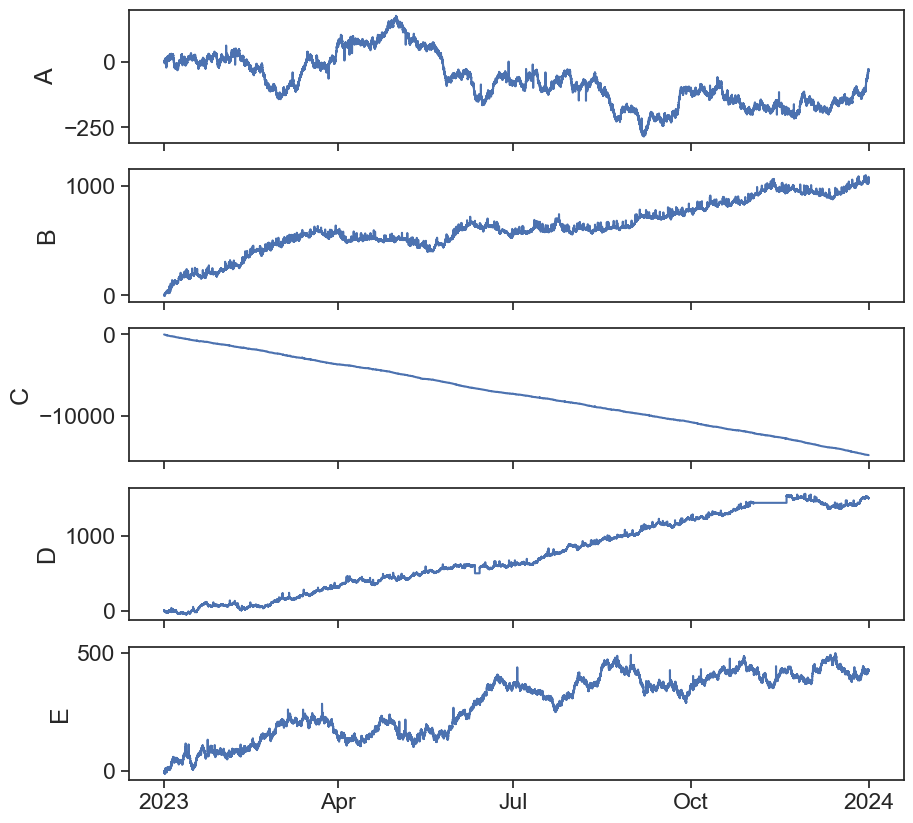

In [6]:
plot_all_columns(df1)

Looks like some of this data needs cleaning...

## dataset 2

In [7]:
df2 = pd.read_csv('cleaning2-.csv')
df2

,A B date time
0,0.0 0.0 01012023 00:00:00
1,-2.0275363548598184 0.011984922825112581 01012...
2,-2.690616715983192 -0.29792822981957684 010120...
3,-1.9859899758267612 -0.30940867922490206 01012...
4,-2.290897621584889 -2.8666633353521624 0101202...
...,...
8755,-74.51464473079395 293.8680858227996 31122023 ...
8756,-74.73805809332175 294.7593463919649 31122023 ...
8757,-75.84842465358788 294.07634907736116 31122023...
8758,-77.27218272637339 293.526461290973 31122023 2...


Something is wrong...  
Let's open the actual `.csv` file and take a quick look.  
It seems that the values are seperated by spaces ` ` and not by commas `,`.

In [8]:
df2 = pd.read_csv('cleaning2-.csv', delimiter=' ')
df2


,A,B,date,time
0,0.000000,0.0,1012023,00:00:00
1,-2.027536,0.011984922825112581,1012023,01:00:00
2,-2.690617,-0.29792822981957684,1012023,02:00:00
3,-1.985990,-0.30940867922490206,1012023,03:00:00
4,-2.290898,-2.8666633353521624,1012023,04:00:00
...,...,...,...,...
8755,-74.514645,293.8680858227996,31122023,19:00:00
8756,-74.738058,294.7593463919649,31122023,20:00:00
8757,-75.848425,294.07634907736116,31122023,21:00:00
8758,-77.272183,293.526461290973,31122023,22:00:00


In [9]:
# convert the date column to datetime
df2['date_corrected'] = pd.to_datetime(df2['date'])
# df2['date_corrected'] = pd.to_datetime(df2['date'], format='%d%m%Y')

df2


,A,B,date,time,date_corrected
0,0.000000,0.0,1012023,00:00:00,1970-01-01 00:00:00.001012023
1,-2.027536,0.011984922825112581,1012023,01:00:00,1970-01-01 00:00:00.001012023
2,-2.690617,-0.29792822981957684,1012023,02:00:00,1970-01-01 00:00:00.001012023
3,-1.985990,-0.30940867922490206,1012023,03:00:00,1970-01-01 00:00:00.001012023
4,-2.290898,-2.8666633353521624,1012023,04:00:00,1970-01-01 00:00:00.001012023
...,...,...,...,...,...
8755,-74.514645,293.8680858227996,31122023,19:00:00,1970-01-01 00:00:00.031122023
8756,-74.738058,294.7593463919649,31122023,20:00:00,1970-01-01 00:00:00.031122023
8757,-75.848425,294.07634907736116,31122023,21:00:00,1970-01-01 00:00:00.031122023
8758,-77.272183,293.526461290973,31122023,22:00:00,1970-01-01 00:00:00.031122023


In [10]:
# df2['date_corrected'] = pd.to_datetime(df2['date'][:780], format='%d%m%Y')
# df2['date_corrected'] = pd.to_datetime(df2['date'][780:800], format='%d%m%Y')
# df2['date'][780:800]

In [11]:
data_types = {'date': str , 'time':str}

# Read the CSV file with specified data types
df2 = pd.read_csv('cleaning2-.csv', delimiter=' ', dtype=data_types)
df2

,A,B,date,time
0,0.000000,0.0,01012023,00:00:00
1,-2.027536,0.011984922825112581,01012023,01:00:00
2,-2.690617,-0.29792822981957684,01012023,02:00:00
3,-1.985990,-0.30940867922490206,01012023,03:00:00
4,-2.290898,-2.8666633353521624,01012023,04:00:00
...,...,...,...,...
8755,-74.514645,293.8680858227996,31122023,19:00:00
8756,-74.738058,294.7593463919649,31122023,20:00:00
8757,-75.848425,294.07634907736116,31122023,21:00:00
8758,-77.272183,293.526461290973,31122023,22:00:00


In [12]:
df2['date_corrected'] = pd.to_datetime(df2['date'], format='%d%m%Y')
df2

,A,B,date,time,date_corrected
0,0.000000,0.0,01012023,00:00:00,2023-01-01
1,-2.027536,0.011984922825112581,01012023,01:00:00,2023-01-01
2,-2.690617,-0.29792822981957684,01012023,02:00:00,2023-01-01
3,-1.985990,-0.30940867922490206,01012023,03:00:00,2023-01-01
4,-2.290898,-2.8666633353521624,01012023,04:00:00,2023-01-01
...,...,...,...,...,...
8755,-74.514645,293.8680858227996,31122023,19:00:00,2023-12-31
8756,-74.738058,294.7593463919649,31122023,20:00:00,2023-12-31
8757,-75.848425,294.07634907736116,31122023,21:00:00,2023-12-31
8758,-77.272183,293.526461290973,31122023,22:00:00,2023-12-31


In [13]:
df2['datetime'] = pd.to_datetime(df2['date'] + ' ' + df2['time'], format='%d%m%Y %H:%M:%S')
df2


,A,B,date,time,date_corrected,datetime
0,0.000000,0.0,01012023,00:00:00,2023-01-01,2023-01-01 00:00:00
1,-2.027536,0.011984922825112581,01012023,01:00:00,2023-01-01,2023-01-01 01:00:00
2,-2.690617,-0.29792822981957684,01012023,02:00:00,2023-01-01,2023-01-01 02:00:00
3,-1.985990,-0.30940867922490206,01012023,03:00:00,2023-01-01,2023-01-01 03:00:00
4,-2.290898,-2.8666633353521624,01012023,04:00:00,2023-01-01,2023-01-01 04:00:00
...,...,...,...,...,...,...
8755,-74.514645,293.8680858227996,31122023,19:00:00,2023-12-31,2023-12-31 19:00:00
8756,-74.738058,294.7593463919649,31122023,20:00:00,2023-12-31,2023-12-31 20:00:00
8757,-75.848425,294.07634907736116,31122023,21:00:00,2023-12-31,2023-12-31 21:00:00
8758,-77.272183,293.526461290973,31122023,22:00:00,2023-12-31,2023-12-31 22:00:00


In [14]:
df2.drop(columns=['date', 'time', 'date_corrected'], inplace=True)
df2.set_index('datetime', inplace=True)
df2

,A,B
datetime,,
2023-01-01 00:00:00,0.000000,0.0
2023-01-01 01:00:00,-2.027536,0.011984922825112581
2023-01-01 02:00:00,-2.690617,-0.29792822981957684
2023-01-01 03:00:00,-1.985990,-0.30940867922490206
2023-01-01 04:00:00,-2.290898,-2.8666633353521624
...,...,...
2023-12-31 19:00:00,-74.514645,293.8680858227996
2023-12-31 20:00:00,-74.738058,294.7593463919649
2023-12-31 21:00:00,-75.848425,294.07634907736116


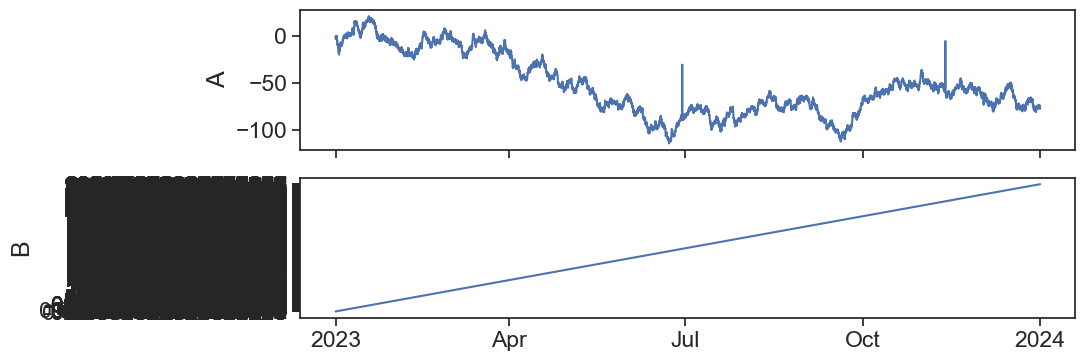

In [15]:
plot_all_columns(df2)

What happened in the second ax?

In [16]:
df2.dtypes

A    float64
B     object
dtype: object

In [17]:
# use pd.to_numeric to convert column 'B' to float
df2['B'] = pd.to_numeric(df2['B'],
                          errors='coerce'  # 'coerce' will convert non-numeric values to NaN if they can't be converted
                          )
df2.dtypes

A    float64
B    float64
dtype: object

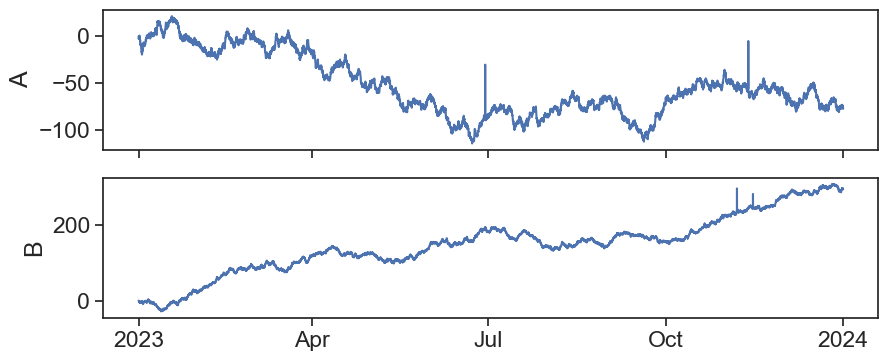

In [18]:
plot_all_columns(df2)

In [19]:
data_types = {'date': str , 'time':str}

# Read the CSV file with specified data types
df2 = pd.read_csv('cleaning2-.csv', delimiter=' ', dtype=data_types, na_values='-')
df2['datetime'] = pd.to_datetime(df2['date'] + ' ' + df2['time'], format='%d%m%Y %H:%M:%S')
df2.drop(columns=['date', 'time'], inplace=True)
df2.set_index('datetime', inplace=True)
df2

,A,B
datetime,,
2023-01-01 00:00:00,0.000000,0.000000
2023-01-01 01:00:00,-2.027536,0.011985
2023-01-01 02:00:00,-2.690617,-0.297928
2023-01-01 03:00:00,-1.985990,-0.309409
2023-01-01 04:00:00,-2.290898,-2.866663
...,...,...
2023-12-31 19:00:00,-74.514645,293.868086
2023-12-31 20:00:00,-74.738058,294.759346
2023-12-31 21:00:00,-75.848425,294.076349


In [20]:
df2.to_csv('cleaning2_formated.csv')

## dataset 3

In [21]:
df3 = pd.read_csv('cleaning3.csv')
df3

,#
0,# data created by
1,# Yair Mau
2,# for time series data analysis
3,#
4,# time format: unix (s)
...,...
370,6.651300774019661 1703635200.0
371,6.4151748349408715 1703721600.0
372,7.603140054178304 1703808000.0
373,8.668182044560869 1703894400.0


Again, let's look at the actual `.csv` file.

In [22]:
df3 = pd.read_csv('cleaning3.csv', comment='#')
df3

,A time
0,0.0 1672531200.0
1,-0.03202661701444382 1672617600.0
2,-0.5863508675173621 1672704000.0
3,-1.5759721567247762 1672790400.0
4,-2.7267995149281266 1672876800.0
...,...
360,6.651300774019661 1703635200.0
361,6.4151748349408715 1703721600.0
362,7.603140054178304 1703808000.0
363,8.668182044560869 1703894400.0


In [23]:
df3 = pd.read_csv('cleaning3.csv', comment='#', delimiter=' ')
df3

,A,time
0,0.000000,1.672531e+09
1,-0.032027,1.672618e+09
2,-0.586351,1.672704e+09
3,-1.575972,1.672790e+09
4,-2.726800,1.672877e+09
...,...,...
360,6.651301,1.703635e+09
361,6.415175,1.703722e+09
362,7.603140,1.703808e+09
363,8.668182,1.703894e+09


In [24]:
df3.dtypes

A       float64
time    float64
dtype: object

Time is in [unix](https://en.wikipedia.org/wiki/Unix_time).  
[unix converter](https://www.epochconverter.com/)

In [25]:
print(df3['time'][0])

1672531200.0


In [26]:
df3['time'] = pd.to_datetime(df3['time'], unit='s')
df3.set_index('time', inplace=True)
df3

,A
time,
2023-01-01,0.000000
2023-01-02,-0.032027
2023-01-03,-0.586351
2023-01-04,-1.575972
2023-01-05,-2.726800
...,...
2023-12-27,6.651301
2023-12-28,6.415175
2023-12-29,7.603140


In [27]:
df3 = pd.read_csv('cleaning3.csv', 
                  index_col='time',     # set the column date as index 
                  parse_dates=True,     # turn to datetime format
                  comment='#', 
                  delimiter=' ')
df3.index = pd.to_datetime(df3.index, unit='s')
df3

,A
time,
2023-01-01,0.000000
2023-01-02,-0.032027
2023-01-03,-0.586351
2023-01-04,-1.575972
2023-01-05,-2.726800
...,...
2023-12-27,6.651301
2023-12-28,6.415175
2023-12-29,7.603140


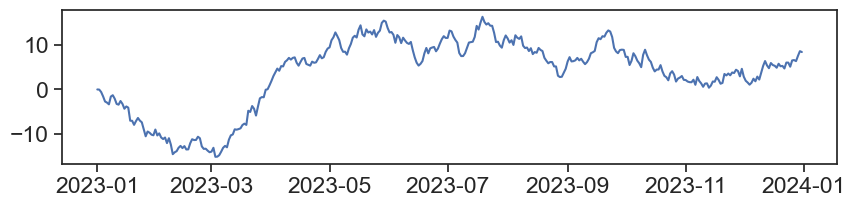

In [28]:
plot_all_columns(df3)

In [29]:
df3.to_csv('cleaning3_formated.csv')